# Project D - Severstal Steel Defect Detection Kaggle Competition 
## Semantic Segmentation of steel defects
### Authors: Utkrisht Rajkumar, Subrato Chakravorty, Chi-Hsin Lo

This file is used to create the figures submitted in our report.

In [1]:
import numpy as np # linear algebra
import pandas as pd
pd.set_option("display.max_rows", 101)
import os
print(os.listdir("../input"))
import cv2
import json
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 15
import seaborn as sns
from collections import Counter
from PIL import Image
import math
import seaborn as sns
from collections import defaultdict
from pathlib import Path
import cv2

['test_images', '.DS_Store', 'test_images.zip', 'train_images.zip', 'train.csv', 'train_images', 'sample_submission.csv']


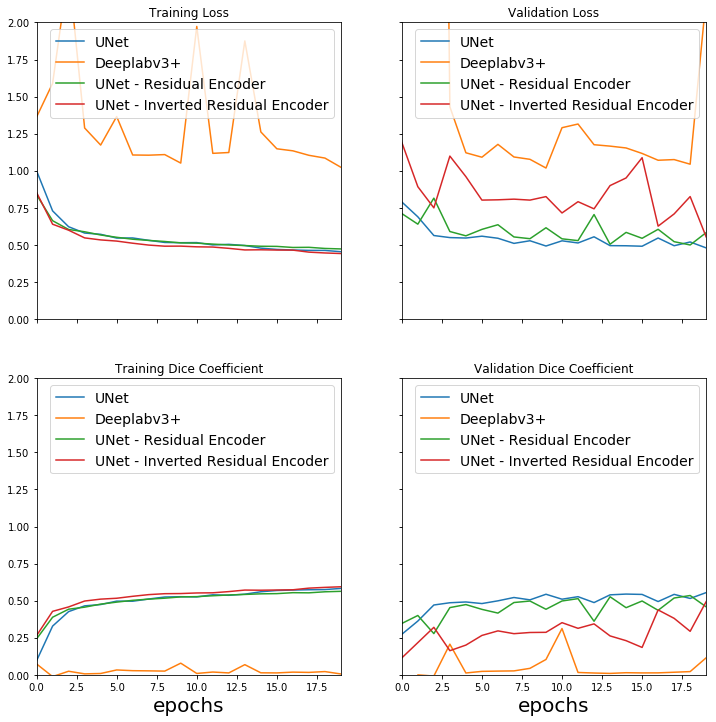

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

files = ['unet_history.csv', 'deeplab_history.csv', 'unet_res_history.csv', 'unet_invres_history.csv']
titles = ['UNet', 'Deeplabv3+', 'UNet - Residual Encoder', 'UNet - Inverted Residual Encoder']
df = pd.DataFrame()

# Plot parameters
params = ['loss','val_loss','dice_coef', 'val_dice_coef']

# Create a dataframe with all the parameters for all models
for i, file in enumerate(files):
    filepath = './history/'+file
    history_df = pd.read_csv(filepath)
    title = titles[i]
    df[title+'_loss'] = history_df['loss']
    df[title+'_val_loss'] = history_df['val_loss']
    df[title+'_dice_coef'] = history_df['dice_coef']
    df[title+'_val_dice_coef'] = history_df['val_dice_coef']

fig, ax = plt.subplots(2, 2, figsize=(12,12), sharex=True, sharey=True)
ax[1,1].set_xlabel("epochs", fontsize=20); ax[1,0].set_xlabel("epochs", fontsize=20);
plot_list = [title+'_'+params[0] for title in titles]
df[plot_list].plot(title="Training Loss", ax=ax[0,0]); ax[0,0].legend(titles, fontsize=14)
plot_list = [title+'_'+params[1] for title in titles]
df[plot_list].plot(title="Validation Loss", ax=ax[0,1], ylim=[0,2]); ax[0,1].legend(titles, fontsize=14)
plot_list = [title+'_'+params[2] for title in titles]
df[plot_list].plot(title="Training Dice Coefficient", ax=ax[1,0]); ax[1,0].legend(titles, fontsize=14)
plot_list = [title+'_'+params[3] for title in titles]
df[plot_list].plot(title="Validation Dice Coefficient", ax=ax[1,1]); ax[1,1].legend(titles, fontsize=14)

Clearly we can see that U-net and U-net with residual encoder seem to perform the best across all four graphs. Deeplab surely performs the worst on all 4 quantifications.

In [5]:
import matplotlib.patches as mpatches
import numpy as np
import cv2
from pathlib import Path
input_dir = "../input/"
train_df = pd.read_csv("../input/train.csv")
train_path = Path("../input/train_images/")
palet = [(249, 192, 12), (0, 185, 241), (114, 0, 218), (249,50,12)]

def name_and_mask(start_idx):
    col = start_idx
    img_names = [str(i).split("_")[0] for i in train_df.iloc[col:col+4, 0].values]
    if not (img_names[0] == img_names[1] == img_names[2] == img_names[3]):
        raise ValueError

    labels = train_df.iloc[col:col+4, 1]
    mask = np.zeros((256, 1600, 4), dtype=np.uint8)

    for idx, label in enumerate(labels.values):
        if label is not np.nan:
            mask_label = np.zeros(1600*256, dtype=np.uint8)
            label = label.split(" ")
            positions = map(int, label[0::2])
            length = map(int, label[1::2])
            for pos, le in zip(positions, length):
                mask_label[pos-1:pos+le-1] = 1
            mask[:, :, idx] = mask_label.reshape(256, 1600, order='F')
    return img_names[0], mask

def show_mask_image(col):
    name, mask = name_and_mask(col)
    img = cv2.imread(str(train_path / name))
    fig, ax = plt.subplots(figsize=(15, 15))

    for ch in range(4):
        contours, _ = cv2.findContours(mask[:, :, ch], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        for i in range(0, len(contours)):
            cv2.polylines(img, contours[i], True, palet[ch], 2)
    ax.set_title(name)
    ax.imshow(img)
    if col==21360:  
        patch = mpatches.Patch(color=(249/255, 192/255, 12/255), label='class 1')
    elif col==21592:  
        patch = mpatches.Patch(color=(0, 185/255, 241/255), label='class 2')
    elif col==5864:   
        patch = mpatches.Patch(color=(114/255, 0, 218/255), label='class 3')
    elif col==696:    
        patch = mpatches.Patch(color=(249/255,50/255,12/255), label='class 4')
  
    plt.legend(handles=[patch])
    plt.show()

TypeError: Layout of the output array image is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)

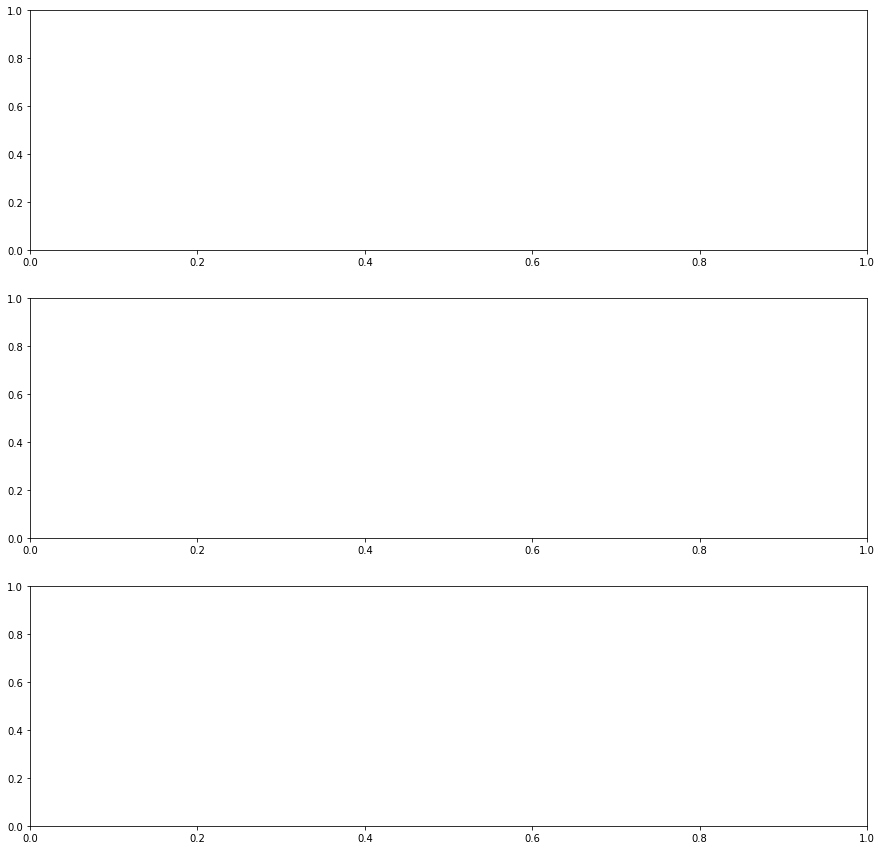

In [11]:
imgs = [21360,21592,696]
fig, ax = plt.subplots(3, 1, figsize=(15, 15))
for idx in imgs:
    name, mask = name_and_mask(idx)
    img = cv2.imread(str(train_path / name))
    mask = mask.copy()
    for ch in range(4):
        contours, _ = cv2.findContours(mask[:, :, ch], cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        for i in range(0, len(contours)):
            cv2.polylines(img, contours[i], True, palet[ch], 2)
    ax.set_title(name)
    ax.imshow(img)
    if col==21360:  
        patch = mpatches.Patch(color=(249/255, 192/255, 12/255), label='class 1')
    elif col==21592:  
        patch = mpatches.Patch(color=(0, 185/255, 241/255), label='class 2')
    elif col==5864:   
        patch = mpatches.Patch(color=(114/255, 0, 218/255), label='class 3')
    elif col==696:    
        patch = mpatches.Patch(color=(249/255,50/255,12/255), label='class 4')
  
    plt.legend(handles=[patch])
    plt.show()

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 ...

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]
  ...
  [0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]


TypeError: Layout of the output array image is incompatible with cv::Mat (step[ndims-1] != elemsize or step[1] != elemsize*nchannels)

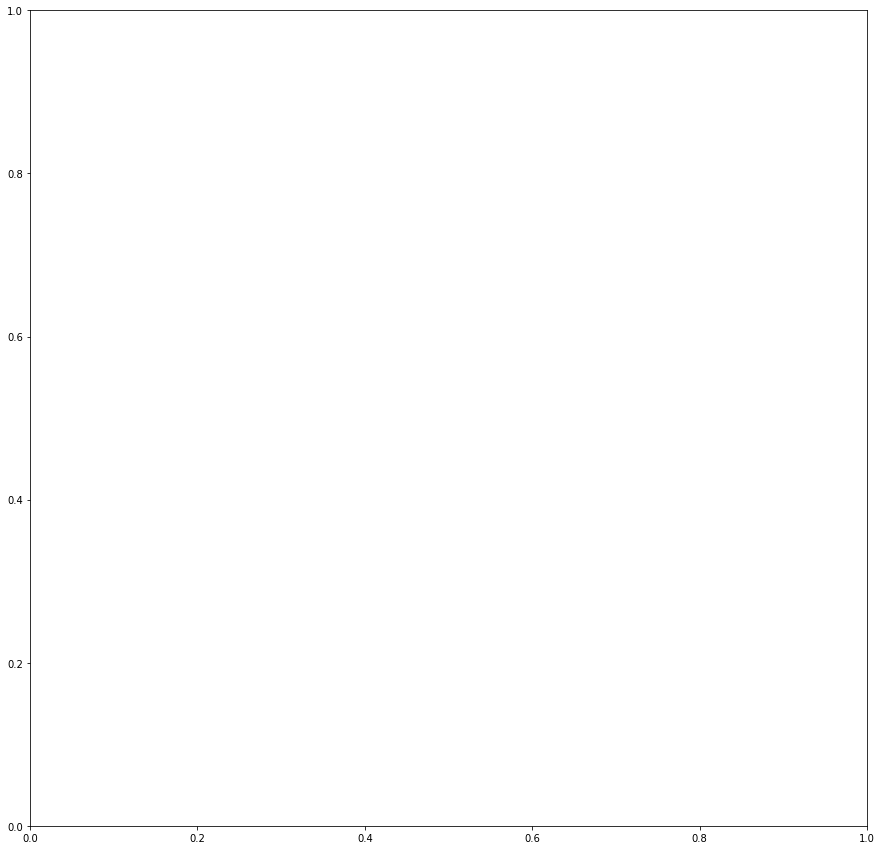

In [6]:
imgs_display = [21360,21592,5864,696]
for idx in imgs_display:
    show_mask_image(idx)